In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.impute import KNNImputer
from scipy.stats import boxcox 

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,f1_score,auc

import warnings
warnings.filterwarnings('ignore')

# 1.Problem statment

# 2.Data Gathering

In [2]:
df = pd.read_csv('Titanic.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# 3.EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3.0 PassengerId

## 3.1 Survived

## 3.2 Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

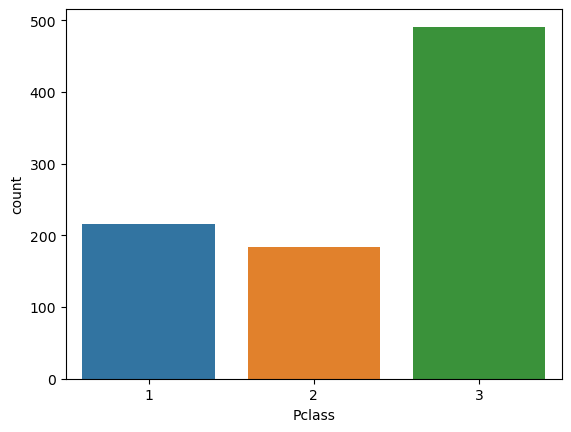

In [7]:
sns.countplot(df['Pclass'])

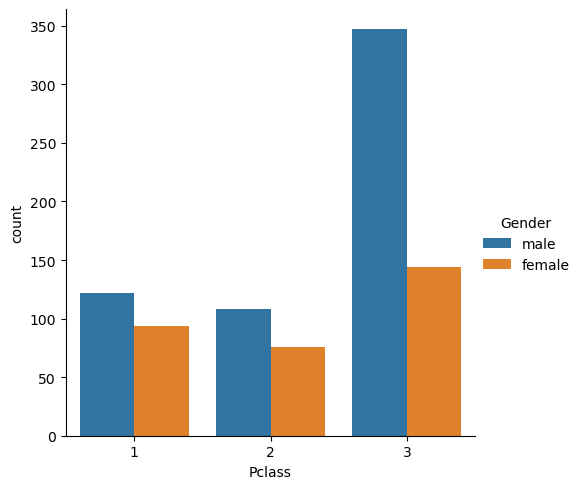

In [8]:
sns.catplot(x="Pclass",y=None,hue='Gender',data=df,kind='count')

Text(0.5, 0.98, 'Class wise segregation of passengers')

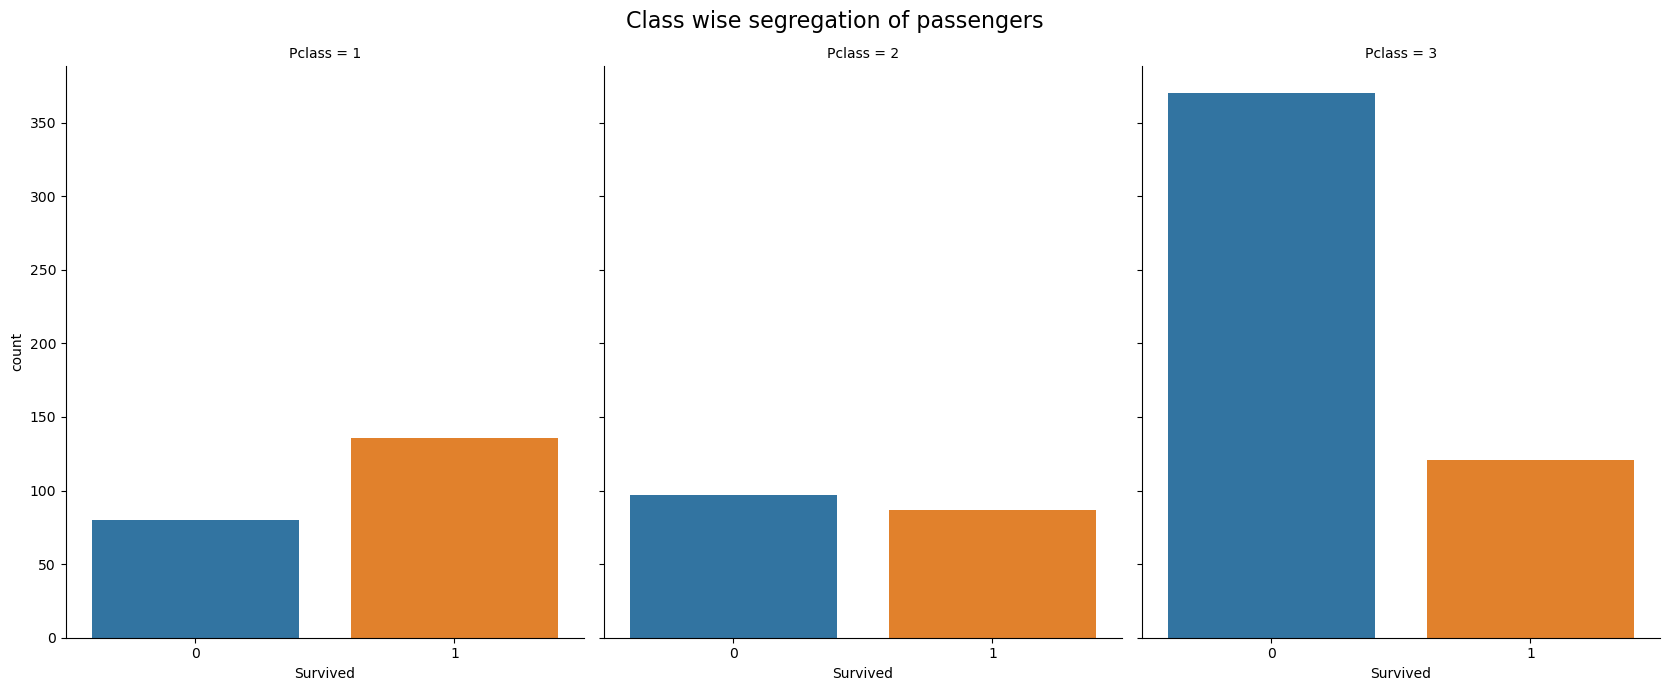

In [9]:
sns.factorplot('Survived', col='Pclass', data=df, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)

## 3.3 Gender 

<AxesSubplot:xlabel='Gender', ylabel='count'>

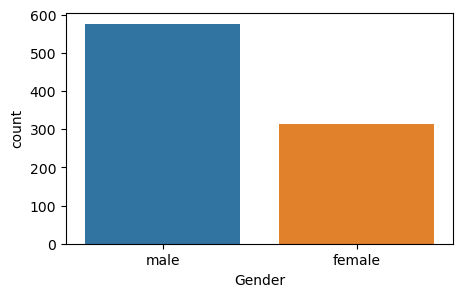

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(df['Gender'])

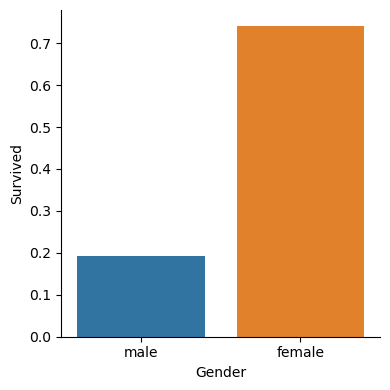

In [11]:
sns.catplot(x="Gender",y="Survived",data=df,kind='bar',ci=None,height=4)

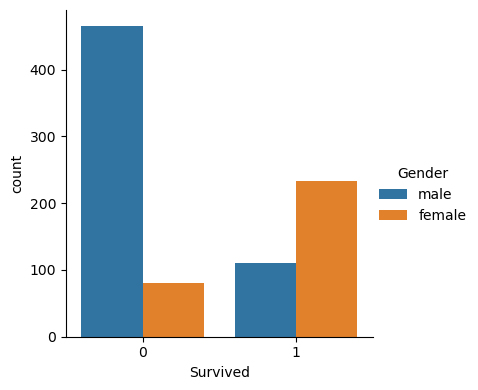

In [12]:
sns.catplot(x="Survived",data=df,kind='count',ci=None,height=4,hue="Gender")

<Figure size 1000x300 with 0 Axes>

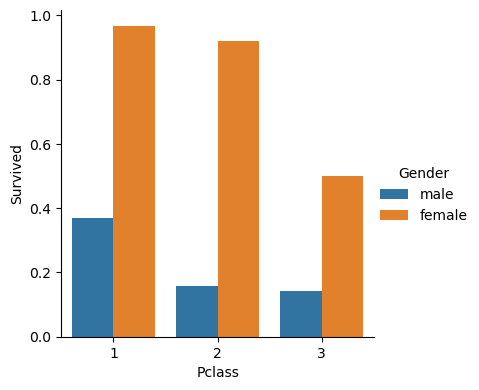

In [13]:
plt.figure(figsize=(10,3))
sns.catplot(x="Pclass",y="Survived",hue='Gender',data=df,kind='bar',ci=None,height=4)

Text(0.5, 0.98, 'Class and gender wise segregation of passengers')

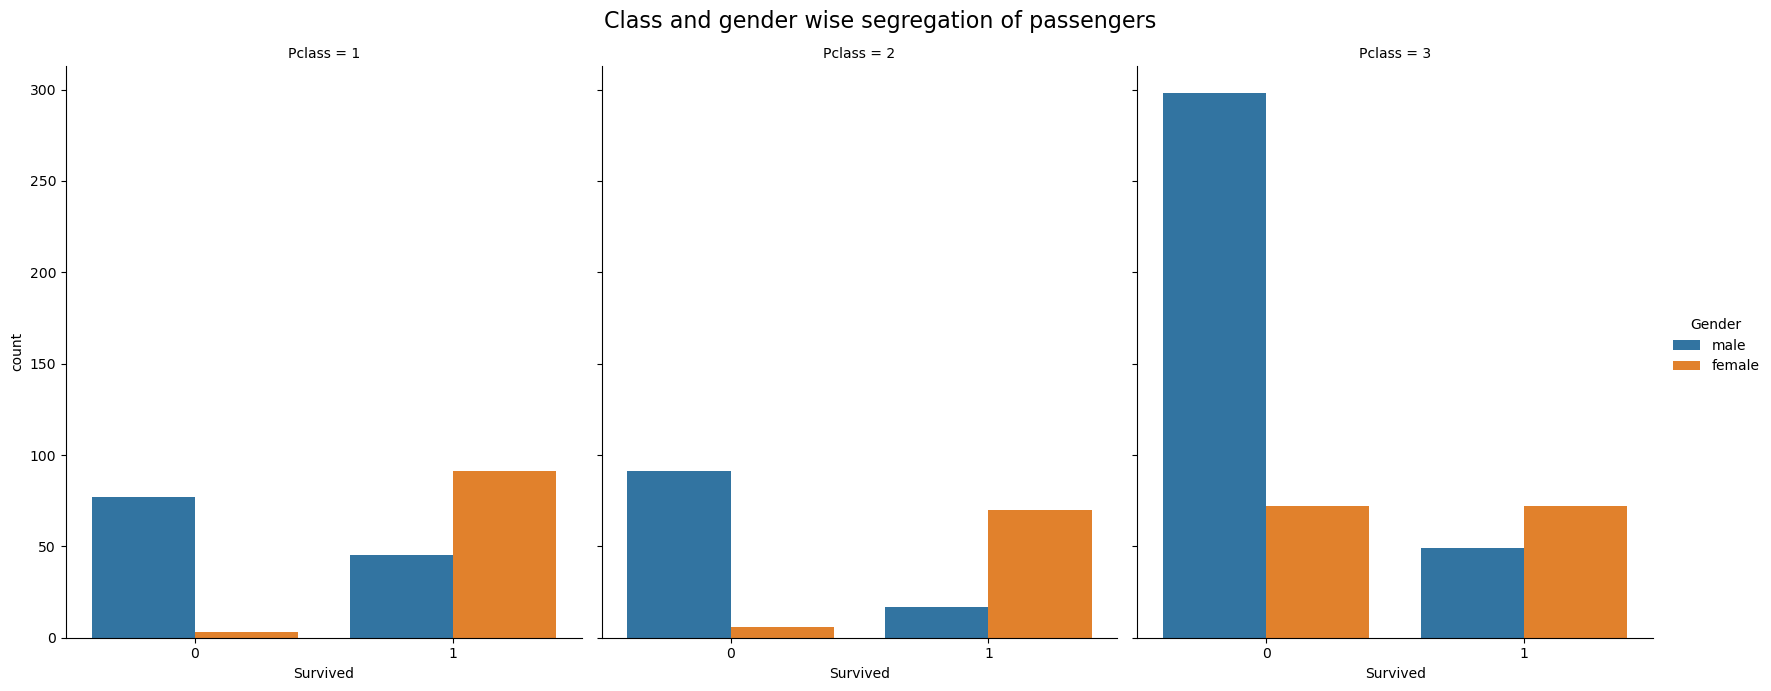

In [14]:
sns.factorplot('Survived', col='Pclass', hue='Gender', data=df, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

## 3.4 Age

In [15]:
df['Age'].isna().sum()/891*100  #19 % missing values in age

19.865319865319865

<AxesSubplot:title={'center':'Age of passengers'}, xlabel='Age', ylabel='Density'>

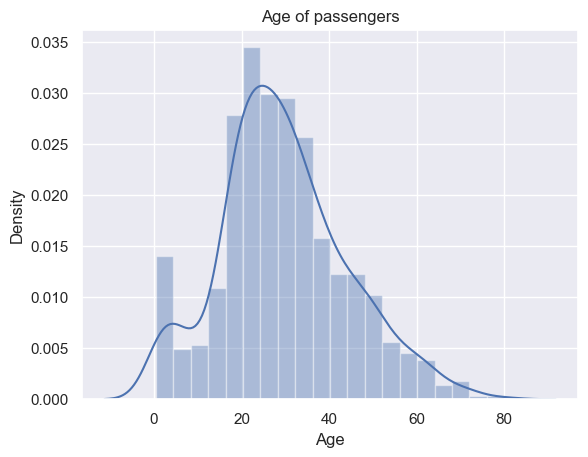

In [16]:
sns.set_theme(style="darkgrid")
plt.title("Age of passengers")
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

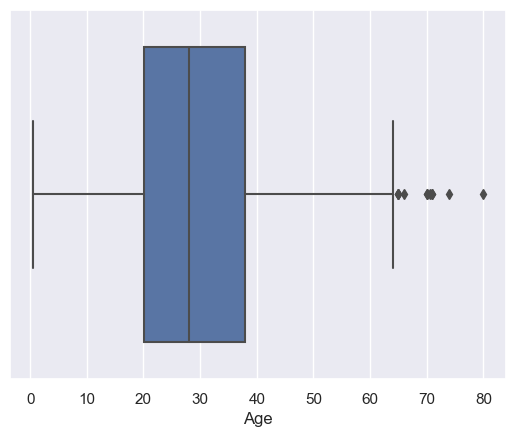

In [17]:
sns.boxplot(df['Age'])

## 3.5 SibSp

<AxesSubplot:>

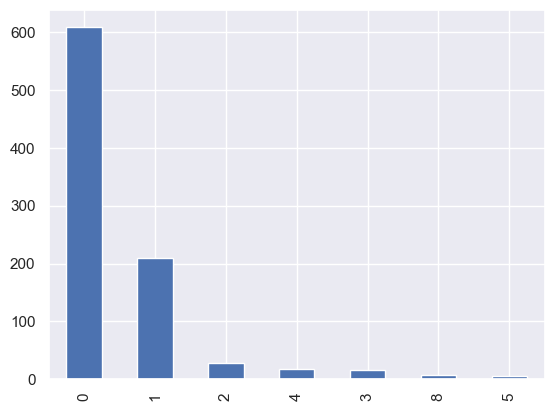

In [18]:
df['SibSp'].value_counts().plot(kind='bar')

In [19]:
df['SibSp'].isna().sum()

0

## 3.6 Parch

In [20]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [21]:
df['Parch'].isna().sum()

0

<AxesSubplot:xlabel='Parch', ylabel='count'>

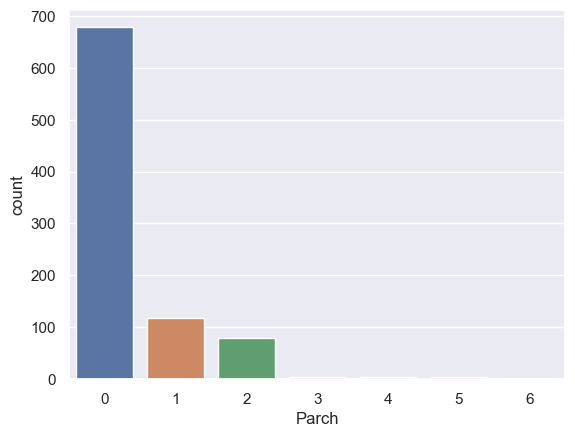

In [22]:
sns.countplot(df['Parch'])

## 3.7 Ticket

In [23]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

## 3.8 Cabin

In [24]:
df['Cabin'].isna().sum()

687

In [25]:
687/891 *100 # 77% values missing values in Cabine feature, We can directly drop this one

77.10437710437711

## 3.9 Embarked

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df['Embarked'].isna().sum() # 2 missing values

2

<AxesSubplot:xlabel='Embarked', ylabel='count'>

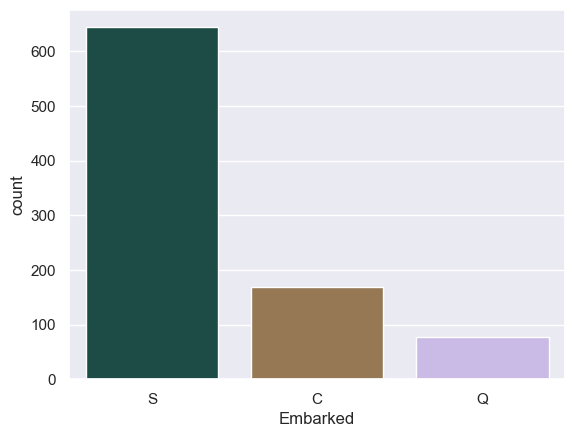

In [28]:
sns.countplot(df['Embarked'],palette=('cubehelix'))

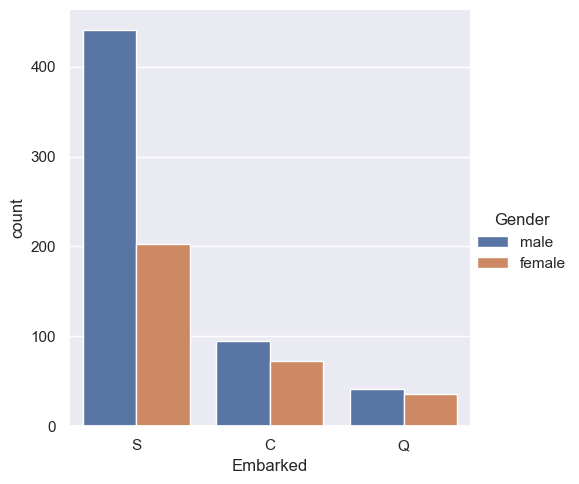

In [29]:
sns.catplot(x="Embarked",hue='Gender',data=df,kind='count',ci=None)

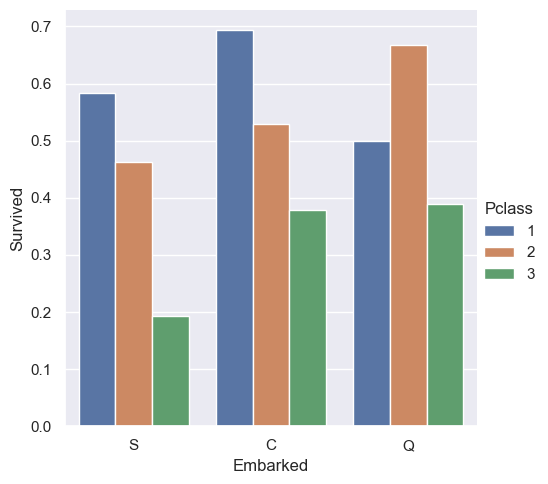

In [30]:
sns.catplot(x="Embarked",y="Survived",hue='Pclass',data=df,kind='bar',ci=None)

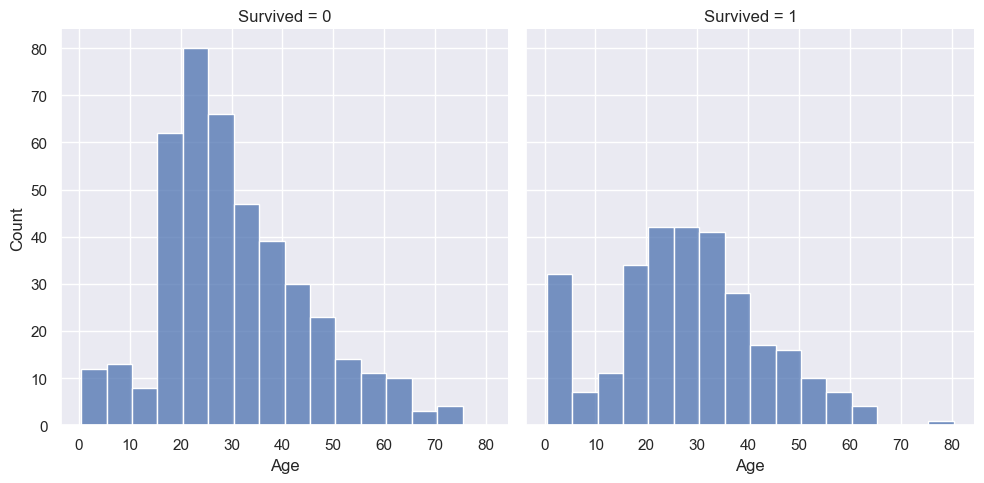

In [31]:
sns.displot(df, x="Age", col="Survived",binwidth=5, height=5, facet_kws=dict(margin_titles=True))

<AxesSubplot:xlabel='Survived', ylabel='count'>

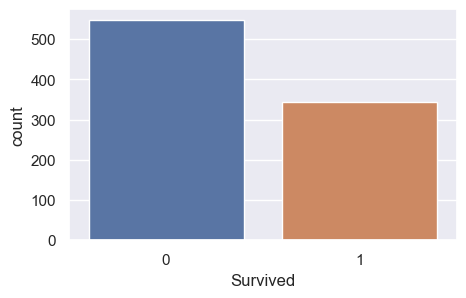

In [32]:
plt.figure(figsize=(5,3))
sns.countplot(df['Survived'])

In [33]:
df['Survived'].value_counts()

0    547
1    344
Name: Survived, dtype: int64

# 4.Feature Engineering

In [34]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [35]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
le_gender = LabelEncoder()
le_gender.fit_transform(df['Gender'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [39]:
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Gender']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Gender, Length: 891, dtype: int32

In [41]:
Gender ='male'
le_gender.transform([Gender])[0]

1

In [42]:
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [43]:
df['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

#### For missing values of Embarked we will go with mode

In [44]:
df['Embarked'].replace({3:2},inplace=True)

In [45]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [46]:
df_cleaned = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [47]:
df_cleaned

Survived  Pclass  Gender   Age  SibSp  Parch     Fare  Embarked
0           0       3       1  22.0      1      0   7.2500         2
1           1       1       0  38.0      1      0  71.2833         0
2           1       3       0  26.0      0      0   7.9250         2
3           1       1       0  35.0      1      0  53.1000         2
4           0       3       1  35.0      0      0   8.0500         2
..        ...     ...     ...   ...    ...    ...      ...       ...
886         0       2       1  27.0      0      0  13.0000         2
887         1       1       0  19.0      0      0  30.0000         2
888         0       3       0   NaN      1      2  23.4500         2
889         1       1       1  26.0      0      0  30.0000         0
890         0       3       1  32.0      0      0   7.7500         1

[891 rows x 8 columns]

In [48]:
df_cleaned.isna().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

#### For missing values of Age we will go with KNN imputer

In [49]:
knn_imputer = KNNImputer()
array = knn_imputer.fit_transform(df_cleaned)
df_cleaned = pd.DataFrame(array,columns=df_cleaned.columns)

In [50]:
df_cleaned.isna().sum() # missing values are handled

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Train test split

In [51]:
x = df_cleaned.drop('Survived',axis=1)
y = df_cleaned['Survived']

In [52]:
x

Pclass  Gender   Age  SibSp  Parch     Fare  Embarked
0       3.0     1.0  22.0    1.0    0.0   7.2500       2.0
1       1.0     0.0  38.0    1.0    0.0  71.2833       0.0
2       3.0     0.0  26.0    0.0    0.0   7.9250       2.0
3       1.0     0.0  35.0    1.0    0.0  53.1000       2.0
4       3.0     1.0  35.0    0.0    0.0   8.0500       2.0
..      ...     ...   ...    ...    ...      ...       ...
886     2.0     1.0  27.0    0.0    0.0  13.0000       2.0
887     1.0     0.0  19.0    0.0    0.0  30.0000       2.0
888     3.0     0.0  26.8    1.0    2.0  23.4500       2.0
889     1.0     1.0  26.0    0.0    0.0  30.0000       0.0
890     3.0     1.0  32.0    0.0    0.0   7.7500       1.0

[891 rows x 7 columns]

In [53]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7,stratify=y)

# LogisticRegression

In [55]:
log_clf = LogisticRegression()

In [56]:
log_clf.fit(x_train,y_train)

LogisticRegression()

# Testing results

In [57]:
y_pred = log_clf.predict(x_test)

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[95 15]
 [18 51]]
Accuracy: 0.8156424581005587
The classification report is:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       110
         1.0       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



# Training results

In [58]:
y_pred_train = log_clf.predict(x_train)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[375  62]
 [ 83 192]]
Accuracy: 0.7963483146067416
The classification report is:
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       437
         1.0       0.76      0.70      0.73       275

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.80      0.79       712



<AxesSubplot:ylabel='Density'>

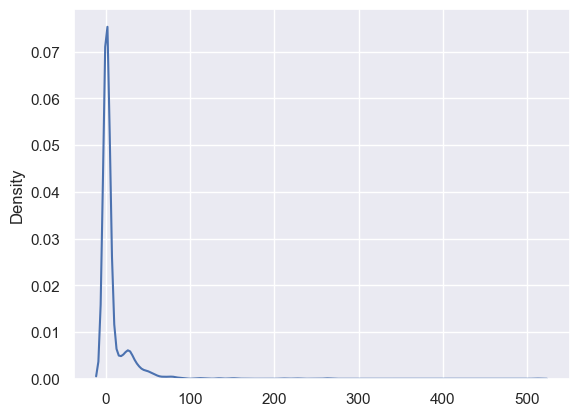

In [59]:
sns.distplot(df_cleaned, hist=False, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

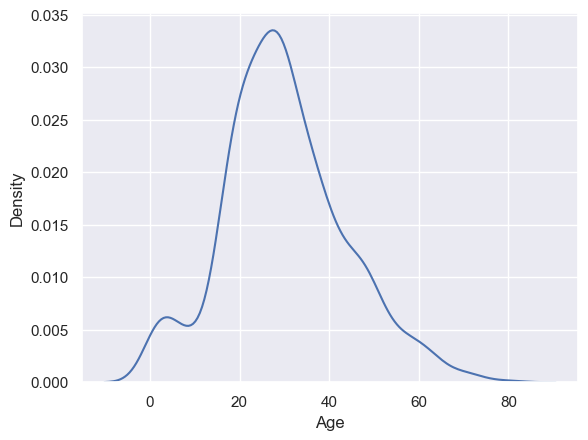

In [60]:
sns.distplot(df_cleaned['Age'], hist=False, kde=True)

<AxesSubplot:ylabel='Density'>

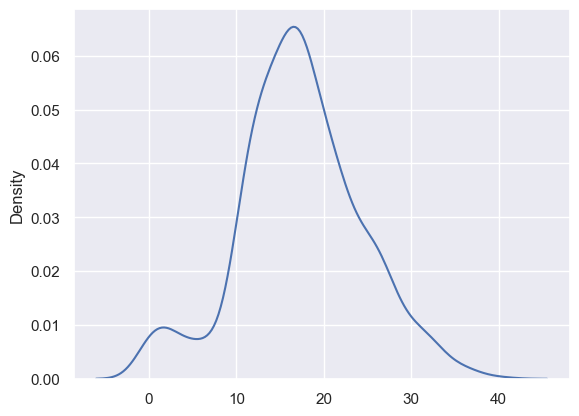

In [61]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(df_cleaned['Age']) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=False, kde=True)

In [62]:
df_cleaned

Survived  Pclass  Gender   Age  SibSp  Parch     Fare  Embarked
0         0.0     3.0     1.0  22.0    1.0    0.0   7.2500       2.0
1         1.0     1.0     0.0  38.0    1.0    0.0  71.2833       0.0
2         1.0     3.0     0.0  26.0    0.0    0.0   7.9250       2.0
3         1.0     1.0     0.0  35.0    1.0    0.0  53.1000       2.0
4         0.0     3.0     1.0  35.0    0.0    0.0   8.0500       2.0
..        ...     ...     ...   ...    ...    ...      ...       ...
886       0.0     2.0     1.0  27.0    0.0    0.0  13.0000       2.0
887       1.0     1.0     0.0  19.0    0.0    0.0  30.0000       2.0
888       0.0     3.0     0.0  26.8    1.0    2.0  23.4500       2.0
889       1.0     1.0     1.0  26.0    0.0    0.0  30.0000       0.0
890       0.0     3.0     1.0  32.0    0.0    0.0   7.7500       1.0

[891 rows x 8 columns]

<AxesSubplot:xlabel='Fare', ylabel='Density'>

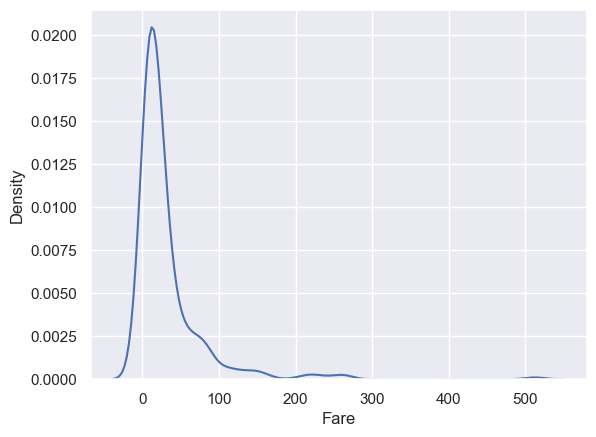

In [63]:
sns.distplot(df_cleaned['Fare'], hist=False, kde=True)

In [64]:
df.loc[(df['Fare'] == 0),'Fare'] = df['Fare'].median()
df.loc[(df['Fare'] == 0),'Fare']

Series([], Name: Fare, dtype: float64)

In [65]:
df_cleaned.describe()

Survived      Pclass      Gender         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.386083    2.308642    0.647587   30.035863    0.523008    0.381594   
std      0.487123    0.836071    0.477990   13.645865    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   21.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   29.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    1.536476  
std     49.693429    0.791503  
min      0.000000    0.000000  
25%      7.910400    1.000000  
50%     14.454200    2.000000  
75%     31.000000    2.000000  
max    512.329200    2.000000

# Handling Outliers using boxcox

<AxesSubplot:xlabel='Pclass'>

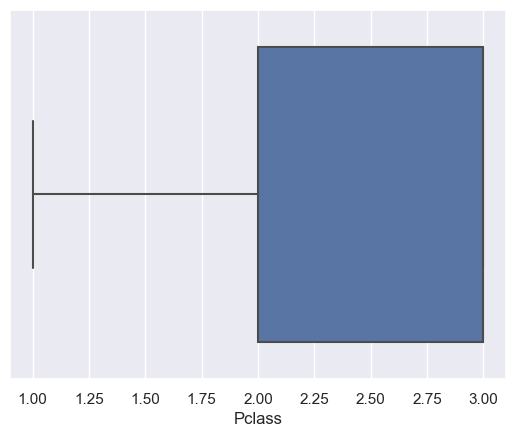

In [66]:
sns.boxplot(df_cleaned['Pclass'])

<AxesSubplot:xlabel='Gender'>

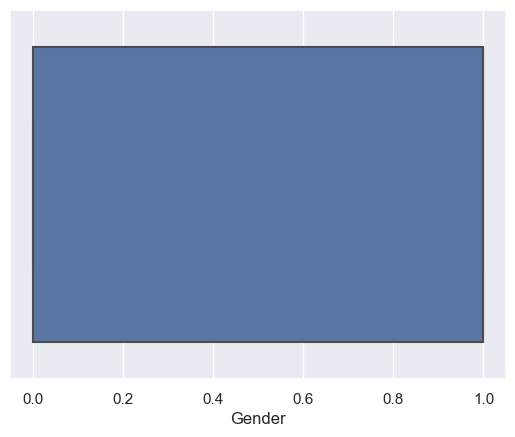

In [67]:
sns.boxplot(df_cleaned['Gender'])

<AxesSubplot:xlabel='Age'>

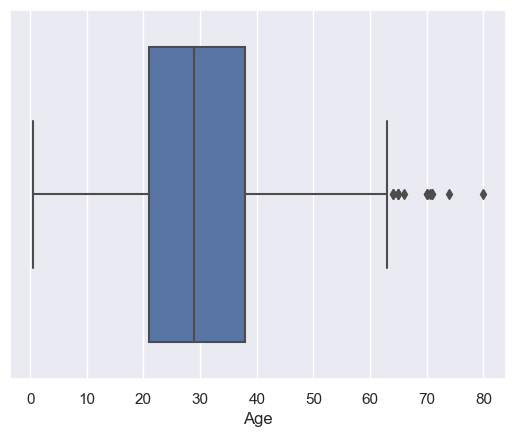

In [68]:
sns.boxplot(df_cleaned['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

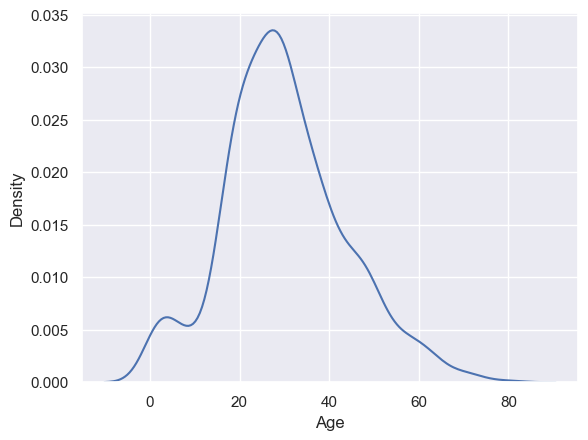

In [69]:
sns.distplot(df_cleaned['Age'], hist=False, kde=True)

<AxesSubplot:ylabel='Density'>

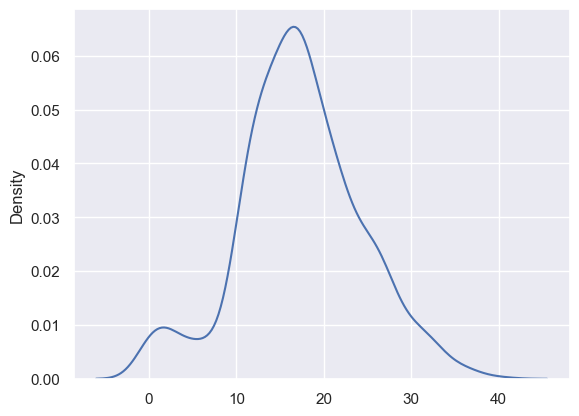

In [70]:
#perform Box-Cox transformation on original data
transformed_data_age, best_lambda = boxcox(df_cleaned['Age']) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data_age, hist=False, kde=True)

In [71]:
df_cleaned['Age'] = transformed_data_age
df_cleaned['Age']

0      13.512716
1      21.585733
2      15.618398
3      20.135016
4      20.135016
         ...    
886    16.134249
887    11.882468
888    16.031392
889    15.618398
890    18.658929
Name: Age, Length: 891, dtype: float64

In [72]:
df_cleaned

Survived  Pclass  Gender        Age  SibSp  Parch     Fare  Embarked
0         0.0     3.0     1.0  13.512716    1.0    0.0   7.2500       2.0
1         1.0     1.0     0.0  21.585733    1.0    0.0  71.2833       0.0
2         1.0     3.0     0.0  15.618398    0.0    0.0   7.9250       2.0
3         1.0     1.0     0.0  20.135016    1.0    0.0  53.1000       2.0
4         0.0     3.0     1.0  20.135016    0.0    0.0   8.0500       2.0
..        ...     ...     ...        ...    ...    ...      ...       ...
886       0.0     2.0     1.0  16.134249    0.0    0.0  13.0000       2.0
887       1.0     1.0     0.0  11.882468    0.0    0.0  30.0000       2.0
888       0.0     3.0     0.0  16.031392    1.0    2.0  23.4500       2.0
889       1.0     1.0     1.0  15.618398    0.0    0.0  30.0000       0.0
890       0.0     3.0     1.0  18.658929    0.0    0.0   7.7500       1.0

[891 rows x 8 columns]

<AxesSubplot:>

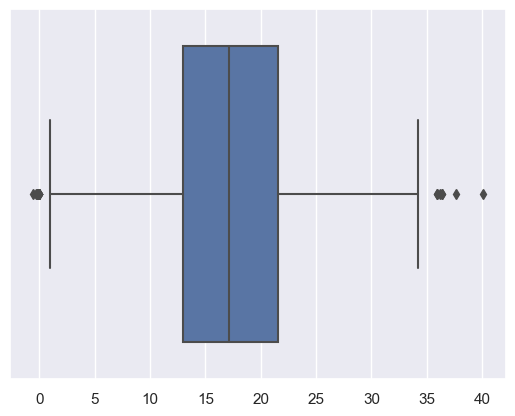

In [73]:
sns.boxplot(transformed_data_age)

<AxesSubplot:xlabel='SibSp'>

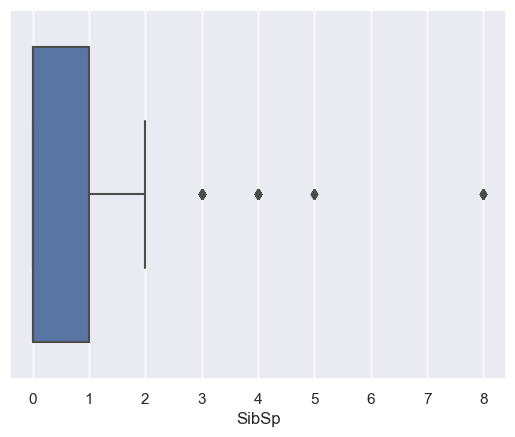

In [74]:
sns.boxplot(df_cleaned['SibSp'])

In [75]:
df_cleaned['SibSp'].value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

In [76]:
# df_cleaned['SibSp'].replace({5:8},inplace=True)

In [77]:
df_cleaned['SibSp'].replace({8:5},inplace=True)

In [78]:
df_cleaned['SibSp'].value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
5.0     12
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

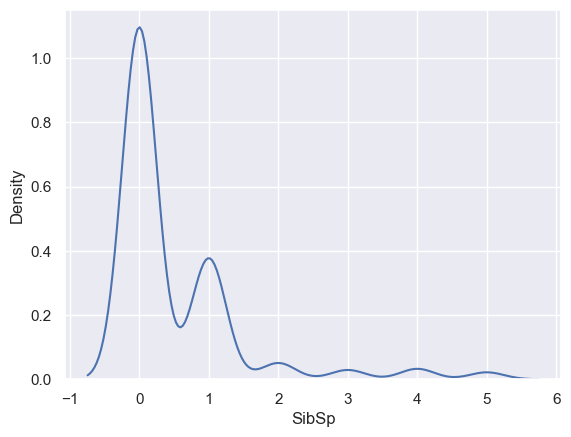

In [79]:
sns.distplot(df_cleaned['SibSp'], hist=False, kde=True)

<AxesSubplot:xlabel='SibSp'>

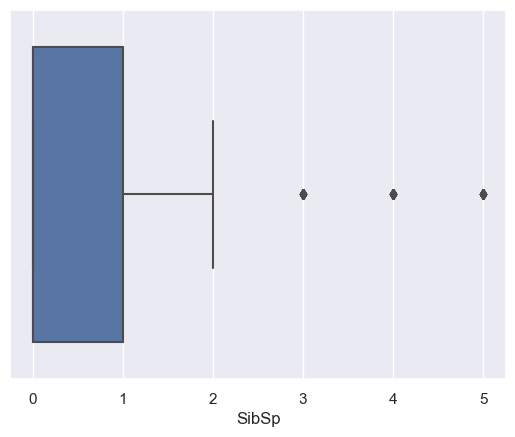

In [80]:
sns.boxplot(df_cleaned['SibSp'])

<AxesSubplot:xlabel='Fare'>

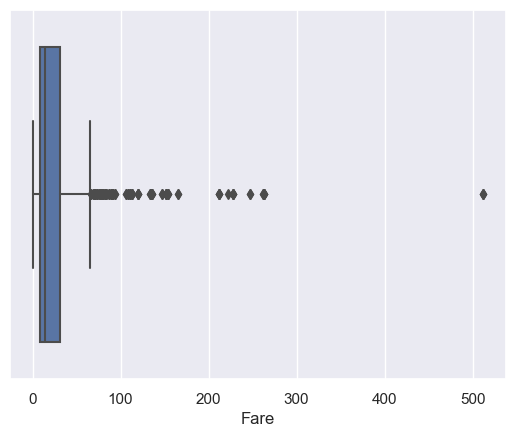

In [81]:
sns.boxplot(df_cleaned['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

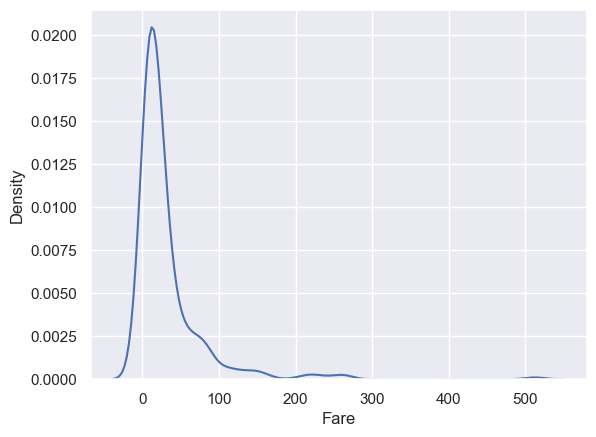

In [82]:
sns.distplot(df_cleaned['Fare'], hist=False, kde=True)

In [83]:
df_cleaned.shape

(891, 8)

In [84]:
df_cleaned = df_cleaned.loc[(df_cleaned['Fare']< 400)]

In [85]:
df_cleaned.shape

(888, 8)

<AxesSubplot:xlabel='Fare'>

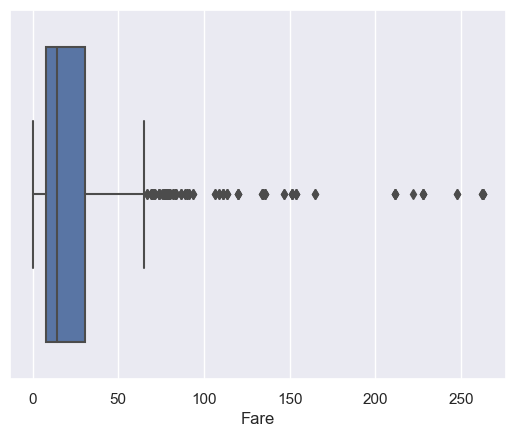

In [86]:
sns.boxplot(df_cleaned['Fare'])

In [87]:
df_cleaned.loc[(df_cleaned['Fare']== 0),'Fare']

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

In [88]:
df_cleaned.loc[(df_cleaned['Fare'] == 0),'Fare'] = df_cleaned['Fare'].median()
df_cleaned.loc[(df['Fare'] == 0),'Fare']

Series([], Name: Fare, dtype: float64)

<AxesSubplot:ylabel='Density'>

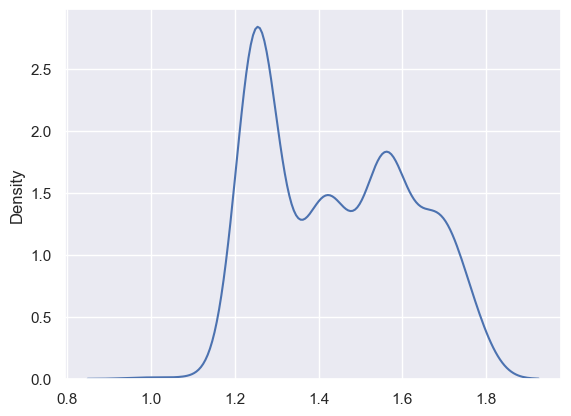

In [89]:
#perform Box-Cox transformation on original data
transformed_data_fare, best_lambda = boxcox(df_cleaned['Fare']) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data_fare, hist=False, kde=True)

<AxesSubplot:>

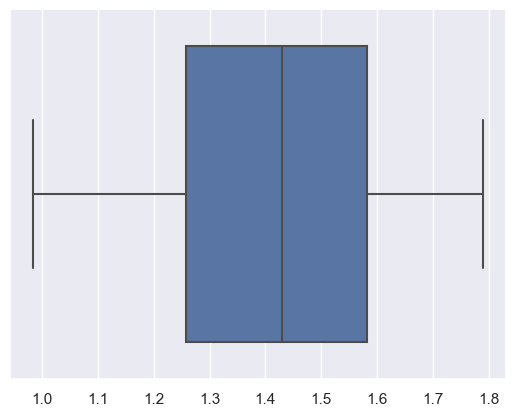

In [90]:
sns.boxplot(transformed_data_fare)

In [91]:
df_cleaned['Fare'] = transformed_data_fare
df_cleaned['Fare']

0      1.226999
1      1.691363
2      1.257461
3      1.658080
4      1.262669
         ...   
886    1.402961
887    1.576703
888    1.533250
889    1.576703
890    1.249954
Name: Fare, Length: 888, dtype: float64

<AxesSubplot:xlabel='Embarked'>

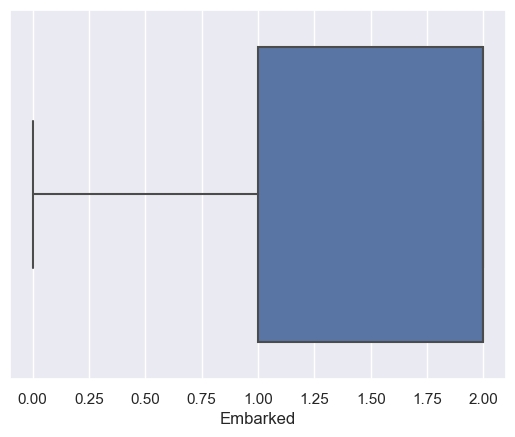

In [92]:
sns.boxplot(df_cleaned['Embarked'])

In [93]:
df_cleaned

Survived  Pclass  Gender        Age  SibSp  Parch      Fare  Embarked
0         0.0     3.0     1.0  13.512716    1.0    0.0  1.226999       2.0
1         1.0     1.0     0.0  21.585733    1.0    0.0  1.691363       0.0
2         1.0     3.0     0.0  15.618398    0.0    0.0  1.257461       2.0
3         1.0     1.0     0.0  20.135016    1.0    0.0  1.658080       2.0
4         0.0     3.0     1.0  20.135016    0.0    0.0  1.262669       2.0
..        ...     ...     ...        ...    ...    ...       ...       ...
886       0.0     2.0     1.0  16.134249    0.0    0.0  1.402961       2.0
887       1.0     1.0     0.0  11.882468    0.0    0.0  1.576703       2.0
888       0.0     3.0     0.0  16.031392    1.0    2.0  1.533250       2.0
889       1.0     1.0     1.0  15.618398    0.0    0.0  1.576703       0.0
890       0.0     3.0     1.0  18.658929    0.0    0.0  1.249954       1.0

[888 rows x 8 columns]

# Testing results after handling outliers

In [94]:
x = df_cleaned.drop('Survived',axis=1)
y = df_cleaned['Survived']

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7,stratify=y)

In [96]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(710, 7)
(178, 7)
(710,)
(178,)


In [97]:
log_clf.fit(x_train,y_train)

LogisticRegression()

# Testing results

In [98]:
y_pred = log_clf.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[95 15]
 [23 45]]
Accuracy: 0.7865168539325843
The classification report is:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       110
         1.0       0.75      0.66      0.70        68

    accuracy                           0.79       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.79      0.78       178



# Training results

In [99]:
y_pred_train = log_clf.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[380  57]
 [ 72 201]]
Accuracy: 0.8183098591549296
The classification report is:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       437
         1.0       0.78      0.74      0.76       273

    accuracy                           0.82       710
   macro avg       0.81      0.80      0.81       710
weighted avg       0.82      0.82      0.82       710



# Sampling

In [100]:
smt = SMOTE(random_state=7)
x_sampled,y_sampled = smt.fit_resample(x,y)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=7,stratify=y_sampled)

In [102]:
print(x_sampled.shape)
print(y_sampled.shape)


(1094, 7)
(1094,)


In [103]:
y_pred = log_clf.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[95 14]
 [35 75]]
Accuracy: 0.776255707762557
The classification report is:
               precision    recall  f1-score   support

         0.0       0.73      0.87      0.79       109
         1.0       0.84      0.68      0.75       110

    accuracy                           0.78       219
   macro avg       0.79      0.78      0.77       219
weighted avg       0.79      0.78      0.77       219



In [104]:
y_pred_train = log_clf.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[380  58]
 [108 329]]
Accuracy: 0.8102857142857143
The classification report is:
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       438
         1.0       0.85      0.75      0.80       437

    accuracy                           0.81       875
   macro avg       0.81      0.81      0.81       875
weighted avg       0.81      0.81      0.81       875



# 2.Knn Classifier

In [105]:
knn_clf = KNeighborsClassifier()

In [106]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

# Testing results over balance data

In [107]:
y_pred = knn_clf.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[91 18]
 [25 85]]
Accuracy: 0.8036529680365296
The classification report is:
               precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       109
         1.0       0.83      0.77      0.80       110

    accuracy                           0.80       219
   macro avg       0.80      0.80      0.80       219
weighted avg       0.80      0.80      0.80       219



# Training results over balance data of KNN

In [108]:
y_pred_train = knn_clf.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[383  55]
 [ 54 383]]
Accuracy: 0.8754285714285714
The classification report is:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       438
         1.0       0.87      0.88      0.88       437

    accuracy                           0.88       875
   macro avg       0.88      0.88      0.88       875
weighted avg       0.88      0.88      0.88       875



In [109]:
nor_scalar = MinMaxScaler()
array = nor_scalar.fit_transform(x_train)
x_train_scaled=pd.DataFrame(array,columns=x_train.columns)

In [110]:
x_train_scaled

Pclass    Gender       Age     SibSp     Parch      Fare  Embarked
0       0.0  0.909973  0.667008  0.018005  0.015005  0.695222       1.0
1       1.0  0.000000  0.082652  0.000000  0.166667  0.463964       0.0
2       1.0  1.000000  0.424728  0.200000  0.000000  0.592261       1.0
3       0.0  1.000000  0.297878  0.000000  0.333333  0.918926       0.0
4       0.0  0.000000  0.542819  0.181786  0.000000  0.897505       1.0
..      ...       ...       ...       ...       ...       ...       ...
870     0.5  0.000000  0.427433  0.000000  0.000000  0.433657       0.5
871     0.0  1.000000  0.451602  0.000000  0.000000  0.736084       1.0
872     1.0  1.000000  0.411135  0.000000  0.000000  0.189597       1.0
873     1.0  1.000000  0.040571  0.800000  0.166667  0.759231       1.0
874     1.0  0.000000  0.378573  0.000000  0.000000  0.228566       1.0

[875 rows x 7 columns]

In [111]:
array = nor_scalar.transform(x_test)
x_test_scaled=pd.DataFrame(array,columns=x_test.columns)

In [112]:
knn_clf.fit(x_train_scaled,y_train)

KNeighborsClassifier()

# Testing results after feature scaling of KNN

In [113]:
y_pred = knn_clf.predict(x_test_scaled) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[99 10]
 [23 87]]
Accuracy: 0.8493150684931506
The classification report is:
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       109
         1.0       0.90      0.79      0.84       110

    accuracy                           0.85       219
   macro avg       0.85      0.85      0.85       219
weighted avg       0.85      0.85      0.85       219



# Training results after feature scaling of KNN

In [114]:
y_pred_train = knn_clf.predict(x_train_scaled)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[393  45]
 [ 73 364]]
Accuracy: 0.8651428571428571
The classification report is:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       438
         1.0       0.89      0.83      0.86       437

    accuracy                           0.87       875
   macro avg       0.87      0.87      0.86       875
weighted avg       0.87      0.87      0.86       875



# Hyperparameters tunning for KNN

In [115]:
knn_cf_hyp = KNeighborsClassifier()

hyperparameters = {'n_neighbors':np.arange(3,30),
                  'p':[1,2]}

gscv_knn_clf = GridSearchCV(knn_cf_hyp,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train_scaled,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=13, p=1)

In [116]:
knn_cf_hyp = gscv_knn_clf.best_estimator_
knn_cf_hyp.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=13, p=1)

In [117]:
y_pred = knn_cf_hyp.predict(x_test_scaled) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[94 15]
 [23 87]]
Accuracy: 0.8264840182648402
The classification report is:
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       109
         1.0       0.85      0.79      0.82       110

    accuracy                           0.83       219
   macro avg       0.83      0.83      0.83       219
weighted avg       0.83      0.83      0.83       219



In [118]:
y_pred_train = knn_cf_hyp.predict(x_train_scaled)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[378  60]
 [ 83 354]]
Accuracy: 0.8365714285714285
The classification report is:
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       438
         1.0       0.86      0.81      0.83       437

    accuracy                           0.84       875
   macro avg       0.84      0.84      0.84       875
weighted avg       0.84      0.84      0.84       875



# Checking the Tradoff values 

In [119]:
train_accuracy = []
test_accuracy = []
k_range = range(3,31)
for k in k_range:
#     print(k)
    knn_clf = KNeighborsClassifier(p=1,n_neighbors= k)
    knn_clf.fit(x_train_scaled,y_train)
    train_accuracy.append(knn_clf.score(x_train_scaled,y_train))
    test_accuracy.append(knn_clf.score(x_test_scaled,y_test))
    
# train_accuracy
# test_accuracy

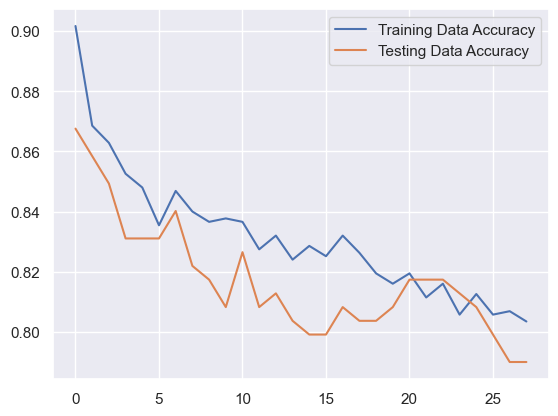

In [120]:
fig,ax = plt.subplots()
ax.plot(train_accuracy,label="Training Data Accuracy")
ax.plot(test_accuracy,label="Testing Data Accuracy")
ax.legend()

In [121]:
max(test_accuracy)

0.867579908675799

In [122]:
test_accuracy[6]

0.8401826484018264

In [123]:
train_accuracy[8]

0.8365714285714285

In [124]:
np.where(test_accuracy == 0.84)[0]

array([], dtype=int64)

In [125]:
knn_clf = KNeighborsClassifier(p=1,n_neighbors= 9)

In [126]:
knn_clf.fit(x_train_scaled,y_train)
knn_clf.score(x_train_scaled,y_train)

0.8468571428571429

In [127]:
knn_clf.score(x_test_scaled,y_test)

0.8401826484018264

In [128]:
train_accuracy = []
test_accuracy = []
k_range = range(3,31)
for k in k_range:
#     print(k)
    knn_clf = KNeighborsClassifier(p=2,n_neighbors= k)
    knn_clf.fit(x_train_scaled,y_train)
    train_accuracy.append(knn_clf.score(x_train_scaled,y_train))
    test_accuracy.append(knn_clf.score(x_test_scaled,y_test))

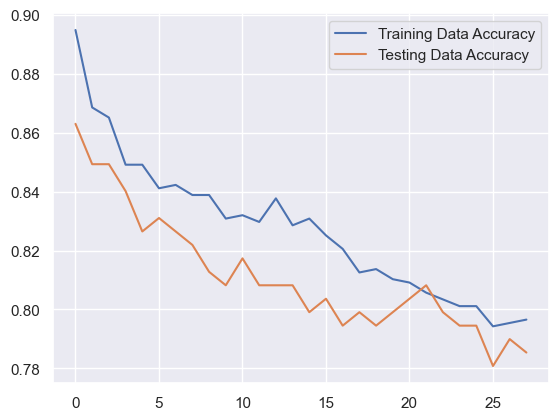

In [129]:
fig,ax = plt.subplots()
ax.plot(train_accuracy,label="Training Data Accuracy")
ax.plot(test_accuracy,label="Testing Data Accuracy")
ax.legend()

# 3.Decision Tree

In [130]:
dt_clf = DecisionTreeClassifier()

In [131]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Testing results

In [132]:
y_pred = dt_clf.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[98 11]
 [20 90]]
Accuracy: 0.8584474885844748
The classification report is:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       109
         1.0       0.89      0.82      0.85       110

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



# Training results

In [133]:
y_pred_train = dt_clf.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[438   0]
 [  8 429]]
Accuracy: 0.9908571428571429
The classification report is:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       438
         1.0       1.00      0.98      0.99       437

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875



Model was overfitting , so we will use hyperparameters to avoid overfitting

# Hyperparameter tunning for Decision tree

In [134]:
dt_clf_hyp = DecisionTreeClassifier()

hyperparameters ={'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(2,20),
                    'min_samples_leaf':np.arange(2,15),
                 }
gscv_dt_clf = GridSearchCV(dt_clf_hyp,hyperparameters,cv =5)
gscv_dt_clf.fit(x_train,y_train)
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [135]:
dt_clf_hyp = gscv_dt_clf.best_estimator_
dt_clf_hyp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [136]:
y_pred = dt_clf_hyp.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[96 13]
 [23 87]]
Accuracy: 0.8356164383561644
The classification report is:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       109
         1.0       0.87      0.79      0.83       110

    accuracy                           0.84       219
   macro avg       0.84      0.84      0.84       219
weighted avg       0.84      0.84      0.84       219



In [137]:
y_pred_train = dt_clf_hyp.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[392  46]
 [102 335]]
Accuracy: 0.8308571428571428
The classification report is:
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       438
         1.0       0.88      0.77      0.82       437

    accuracy                           0.83       875
   macro avg       0.84      0.83      0.83       875
weighted avg       0.84      0.83      0.83       875



# Prunning method

In [138]:
dt_clf_new = DecisionTreeClassifier(random_state=7)
dt_clf_new.fit(x_train,y_train)

DecisionTreeClassifier(random_state=7)

# Testing results

In [139]:
y_pred = dt_clf_new.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[97 12]
 [20 90]]
Accuracy: 0.8538812785388128
The classification report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       109
         1.0       0.88      0.82      0.85       110

    accuracy                           0.85       219
   macro avg       0.86      0.85      0.85       219
weighted avg       0.86      0.85      0.85       219



In [140]:
y_pred_train = dt_clf_new.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[438   0]
 [  8 429]]
Accuracy: 0.9908571428571429
The classification report is:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       438
         1.0       1.00      0.98      0.99       437

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875



In [141]:
array = dt_clf_new.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = array['ccp_alphas']
training_Accuracy= []
testing_Accuracy= []
for ccp in ccp_alpha_list:
#     print(ccp)
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp,random_state=7)
    dt_clf.fit(x_train,y_train)
    training_Accuracy.append(dt_clf.score(x_train,y_train))
    testing_Accuracy.append(dt_clf.score(x_test,y_test))
# training_Accuracy
# testing_Accuracy

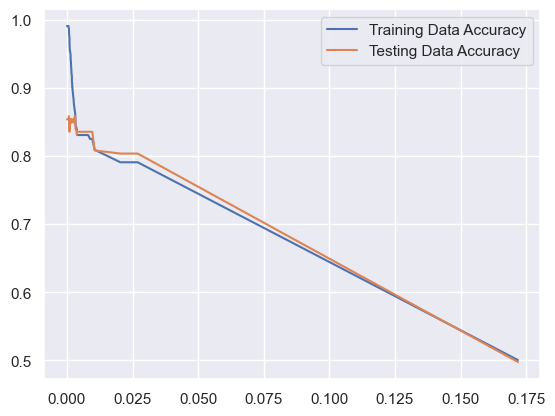

In [142]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,training_Accuracy,label="Training Data Accuracy")
ax.plot(ccp_alpha_list,testing_Accuracy,label="Testing Data Accuracy")
ax.legend()

In [143]:
max(testing_Accuracy)

0.8584474885844748

In [144]:
ccp_alpha_list

array([0.        , 0.00019048, 0.00033333, 0.00035374, 0.00038095,
       0.00038095, 0.00057143, 0.00057143, 0.00058377, 0.0007563 ,
       0.0007619 , 0.0007619 , 0.0007619 , 0.0007619 , 0.0007619 ,
       0.0007619 , 0.00079025, 0.00081385, 0.00085714, 0.00091429,
       0.00095238, 0.00095238, 0.00095782, 0.00097959, 0.00101587,
       0.00101587, 0.00106005, 0.00106667, 0.00107143, 0.00108942,
       0.00124337, 0.00124675, 0.00136054, 0.00137143, 0.00137868,
       0.00138528, 0.00146087, 0.00152381, 0.00152381, 0.00155206,
       0.0016254 , 0.00163265, 0.0017551 , 0.00182857, 0.00186667,
       0.00187286, 0.00195918, 0.00198557, 0.002     , 0.00202156,
       0.00203008, 0.00212547, 0.0024997 , 0.00262862, 0.00281884,
       0.00294172, 0.00311933, 0.00316484, 0.00322701, 0.00326531,
       0.00370542, 0.00380952, 0.00381277, 0.00453515, 0.00805134,
       0.00879638, 0.00965677, 0.01056135, 0.02036288, 0.02693527,
       0.17187741])

In [145]:
testing_Accuracy[55]  #45

0.8584474885844748

In [146]:
training_Accuracy[55]

0.8674285714285714

In [147]:
ccp_alpha_list[55]

0.0029417172274315145

In [148]:
dt_clf_new = DecisionTreeClassifier(random_state=7,ccp_alpha=ccp_alpha_list[55])
dt_clf_new.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0029417172274315145, random_state=7)

In [149]:
y_pred = dt_clf_new.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[93 16]
 [15 95]]
Accuracy: 0.8584474885844748
The classification report is:
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       109
         1.0       0.86      0.86      0.86       110

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



In [150]:
y_pred_train = dt_clf_new.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[372  66]
 [ 50 387]]
Accuracy: 0.8674285714285714
The classification report is:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       438
         1.0       0.85      0.89      0.87       437

    accuracy                           0.87       875
   macro avg       0.87      0.87      0.87       875
weighted avg       0.87      0.87      0.87       875



# 4.Random Forest

In [151]:
rf_clf = RandomForestClassifier()

In [152]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

# Testing reults

In [153]:
y_pred = rf_clf.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[98 11]
 [19 91]]
Accuracy: 0.863013698630137
The classification report is:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       109
         1.0       0.89      0.83      0.86       110

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.87      0.86      0.86       219



# Training results

In [154]:
y_pred_train = rf_clf.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[436   2]
 [  6 431]]
Accuracy: 0.9908571428571429
The classification report is:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       438
         1.0       1.00      0.99      0.99       437

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875



# Hyperparameter tunning on Random forest

In [155]:
rf_clf_hyp = RandomForestClassifier()

hyperparameters ={'n_estimators':np.arange(10,200),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(2,20),
                    'min_samples_leaf':np.arange(3,15),
                   "oob_score" : [True],
                "random_state" : [7]
                 }

gscv_rf_clf = RandomizedSearchCV(rf_clf_hyp,hyperparameters,cv =5)
gscv_rf_clf.fit(x_train,y_train)
gscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=94, oob_score=True, random_state=7)

In [156]:
rf_clf_hyp = gscv_rf_clf.best_estimator_
rf_clf_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=94, oob_score=True, random_state=7)

In [157]:
y_pred = rf_clf_hyp.predict(x_test) #testing

cnf_mat = confusion_matrix(y_test,y_pred)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[99 10]
 [25 85]]
Accuracy: 0.8401826484018264
The classification report is:
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       109
         1.0       0.89      0.77      0.83       110

    accuracy                           0.84       219
   macro avg       0.85      0.84      0.84       219
weighted avg       0.85      0.84      0.84       219



In [158]:
y_pred_train = rf_clf_hyp.predict(x_train)  #training

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix is:\n",cnf_mat)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("The classification report is:\n",clf_report)

The confusion matrix is:
 [[406  32]
 [ 85 352]]
Accuracy: 0.8662857142857143
The classification report is:
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.87       438
         1.0       0.92      0.81      0.86       437

    accuracy                           0.87       875
   macro avg       0.87      0.87      0.87       875
weighted avg       0.87      0.87      0.87       875



# Conclusion

In [159]:
list_models = [log_clf,knn_clf,knn_cf_hyp,dt_clf,dt_clf_hyp,dt_clf_new,rf_clf,rf_clf_hyp]

In [160]:
models = [log_clf,knn_clf,knn_cf_hyp,dt_clf,dt_clf_hyp,dt_clf_new,rf_clf,rf_clf_hyp]
list_models = ['log_clf','knn_clf','knn_cf_hyp','dt_clf','dt_clf_hyp','dt_clf_new','rf_clf','rf_clf_hyp']
accuracy_train = []
accuracy_test = []
# precision_train = []
# precision_test= []

for i in models:
    accuracy = i.score(x_train,y_train)
    accuracy_train.append(accuracy*100)
#     print(accuracy)
    accuracy = i.score(x_test,y_test)
    accuracy_test.append(accuracy*100)
#     print(accuracy)
s1 = pd.Series(accuracy_train,index = list_models)
s2 = pd.Series(accuracy_test,index = list_models)

<AxesSubplot:title={'center':'Training accuracy'}>

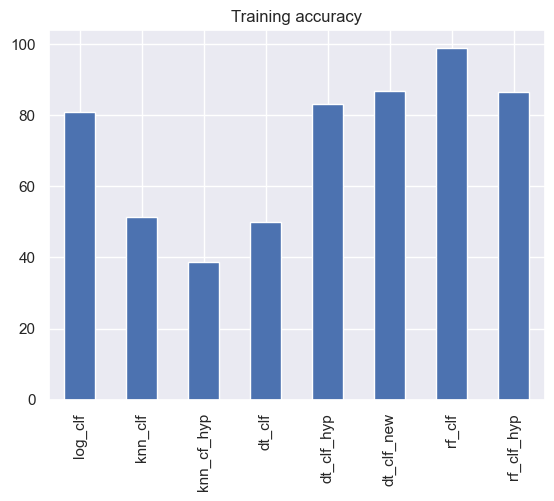

In [161]:
s1.plot(kind='bar',title="Training accuracy")

<AxesSubplot:title={'center':'Testing accuracy'}>

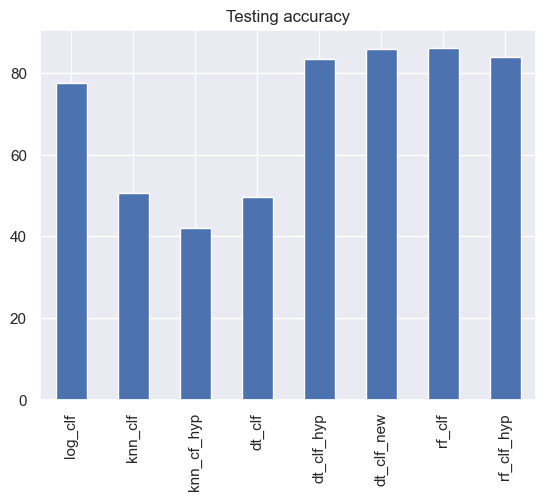

In [162]:
s2.plot(kind='bar',title="Testing accuracy")

In [163]:
models = [knn_clf,knn_cf_hyp,]
list_models = ['knn_clf','knn_cf_hyp']
accuracy_train = []
accuracy_test = []
# precision_train = []
# precision_test= []

for i in models:
    accuracy = i.score(x_train_scaled,y_train)
    accuracy_train.append(accuracy*100)
#     print(accuracy)
    accuracy = i.score(x_test_scaled,y_test)
    accuracy_test.append(accuracy*100)
#     print(accuracy)
s1 = pd.Series(accuracy_train,index = list_models)
s2 = pd.Series(accuracy_test,index = list_models)

<AxesSubplot:title={'center':'Training accuracy on scaled data'}>

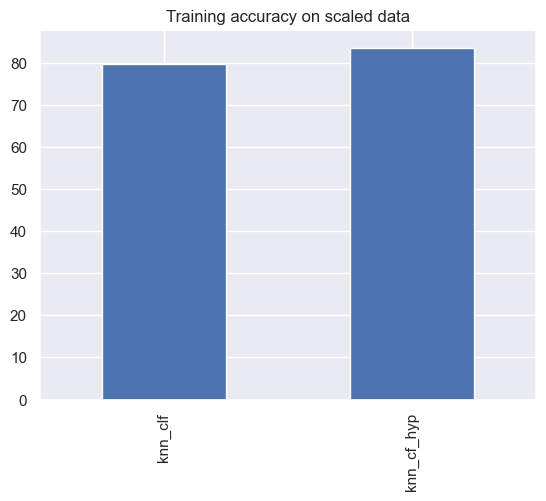

In [164]:
s1.plot(kind='bar',title="Training accuracy on scaled data")

<AxesSubplot:title={'center':'Testing accuracy on scaled data'}>

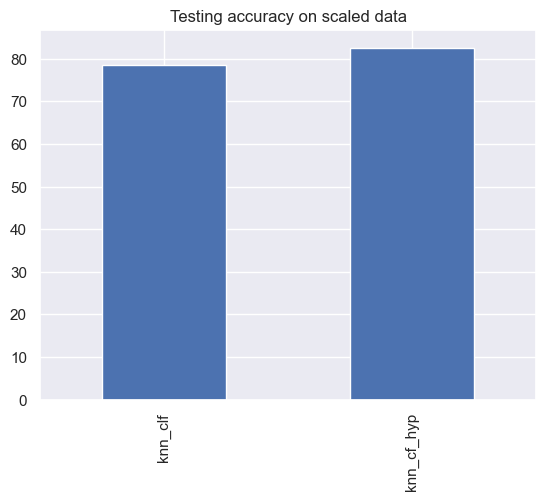

In [165]:
s2.plot(kind='bar',title="Testing accuracy on scaled data")

# Single row testing

In [166]:
df_cleaned

Survived  Pclass  Gender        Age  SibSp  Parch      Fare  Embarked
0         0.0     3.0     1.0  13.512716    1.0    0.0  1.226999       2.0
1         1.0     1.0     0.0  21.585733    1.0    0.0  1.691363       0.0
2         1.0     3.0     0.0  15.618398    0.0    0.0  1.257461       2.0
3         1.0     1.0     0.0  20.135016    1.0    0.0  1.658080       2.0
4         0.0     3.0     1.0  20.135016    0.0    0.0  1.262669       2.0
..        ...     ...     ...        ...    ...    ...       ...       ...
886       0.0     2.0     1.0  16.134249    0.0    0.0  1.402961       2.0
887       1.0     1.0     0.0  11.882468    0.0    0.0  1.576703       2.0
888       0.0     3.0     0.0  16.031392    1.0    2.0  1.533250       2.0
889       1.0     1.0     1.0  15.618398    0.0    0.0  1.576703       0.0
890       0.0     3.0     1.0  18.658929    0.0    0.0  1.249954       1.0

[888 rows x 8 columns]

In [167]:
df.loc[7]

PassengerId                                 8
Survived                                    0
Pclass                                      3
Name           Palsson, Master. Gosta Leonard
Gender                                      1
Age                                       2.0
SibSp                                       3
Parch                                       1
Ticket                                 349909
Fare                                   21.075
Cabin                                     NaN
Embarked                                    2
Name: 7, dtype: object

In [168]:
df_cleaned.loc[7]

Survived    0.000000
Pclass      3.000000
Gender      1.000000
Age         0.925679
SibSp       3.000000
Parch       1.000000
Fare        1.512579
Embarked    2.000000
Name: 7, dtype: float64

In [169]:
Pclass=3.000000
Gender='male'
Age= 45
SibSp= 3.000000
Parch= 1.000000
Fare=13.0000
Embarked='Q'

In [180]:
Gender = le_gender.transform([Gender])[0]

In [ ]:
Embarked =le_embarked.transform([Embarked])[0]
# Embarked

In [177]:
Embarked

1

In [181]:
test_array = np.array([Pclass,Gender,Age,SibSp,Parch,Fare,Embarked])
test_array

array([ 3.,  1., 45.,  3.,  1., 13.,  1.])

In [182]:
rf_clf.predict([test_array])[0]

0.0

# Creating pickle files

In [185]:
import pickle
import json

In [188]:
leble_models =[le_gender,le_embarked]

In [189]:
with open("Random_forest_model.pkl",'wb') as f:
    pickle.dump(rf_clf,f)

In [190]:
with open("label_encoder_model.pkl",'wb') as f:
    pickle.dump(leble_models,f)